# Introducción a Python y Jupyter Notebooks para el análisis de datos


## Parte 3: Pandas

`Pandas` es una biblioteca de código abierto para Python ampliamente utilizada en ciencia de datos, análisis de datos y manipulación de estructuras de datos. Fue diseñada para facilitar el trabajo con datos tabulares (similares a las hojas de cálculo) y proporcionar herramientas potentes y flexibles para su manipulación y análisis.

Asegurate de tener instalado Pandas en tu ambiente conda:

```Bash
conda install pandas
```

Otra libreria util que utilizaremos es `scikit-learn`, es una biblioteca diseñada para tareas de aprendizaje automático y análisis de datos. Es una de las herramientas más populares para implementar modelos de machine learning debido a su facilidad de uso, amplia documentación y versatilidad.

```Bash
conda install -c anaconda scikit-learn
```

In [69]:
# Importa las biblotecas

import pandas as pd
from sklearn.datasets import load_iris

# pd es un alias para pandas, lo usaremos para hacer referencia a la biblioteca

In [70]:
# Importa tu base de datos desde un archivo xlsx:
# path absoluto: C:/Users/Usuario/Desktop/Python/Clase 3/archivo.xlsx
# df = pd.read_excel('C:/Users/Usuario/Desktop/Python/Clase 3/archivo.xlsx')

# path relativo: archivo.xlsx
# df = pd.read_excel('archivo.xlsx') # Si el archivo está en la misma carpeta que el script

In [71]:
# tambien podemos trabajar con bases de datos que ya vienen en la biblioteca como Iris

# Cargar el dataset Iris
iris = load_iris()
# Convertir a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
# Agregar una columna con las especies
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
# Convertir las especies a etiquetas (nombres de flores)
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Puedes explorar y obtener informacion de tu df usando los comandos:
- `head()`
- `info()`
- `describe()`

In [74]:
# Información básica del dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
# Estadísticas descriptivas de las columnas numéricas
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [76]:
# Revisar valores únicos en la columna species
print(iris_df['species'].unique())

['setosa' 'versicolor' 'virginica']


In [77]:
# Seleccionar columnas específicas
sepals = iris_df[['sepal length (cm)', 'sepal width (cm)']]
print(sepals.head())

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6


In [78]:
# agregamos una fila con valores faltantes

import numpy as np  # Biblioteca para usar NaN

# Agregar una fila con NaN
iris_df.loc[len(iris_df)] = [np.nan, np.nan, np.nan, np.nan, "setosa"]

# Verificar que la fila se ha agregado
iris_df.tail()  # Mostrar las últimas filas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,NaN,NaN,NaN,NaN,setosa


In [79]:
# con la función isnull() podemos revisar si hay valores nulos en el dataset:

iris_df.isnull().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    1
petal width (cm)     1
species              0
dtype: int64

In [80]:
# En caso de presentarse valores nulos, podemos eliminarlos con la función dropna():

iris_df.dropna(inplace=True)  # Eliminar filas con NaN

iris_df.tail()  # Mostrar las últimas filas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [81]:
# También podemos rellenar los valores faltantes con un valor específico, por ejemplo 0:

iris_df.fillna(0, inplace=True)  # Rellenar con 0
iris_df.tail()  # Mostrar las últimas filas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [82]:
# renombrar columnas en el df:

iris_df.rename(columns={'sepal length (cm)': 'largo_sepalo (cm)', 'sepal width (cm)': 'ancho_sepalo (cm)'}, inplace=True)
iris_df.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
# filtrar datos específicos en el df:

# Filtrar filas con especie virginica
virginica = iris_df[iris_df['species'] == 'virginica']

virginica.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [84]:
# filtrar datos específicos en el df:

# Filtrar filas con especie setosa y largo mayor a 5.0

setosa_largo = iris_df[(iris_df['species'] == 'setosa') & (iris_df['largo_sepalo (cm)'] > 5.0)]
# & se usa para combinar múltiples condiciones lógicas. 
# En este caso, estamos filtrando filas con especie setosa y largo de sépalo mayor a 5.0 cm.
setosa_largo.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [85]:
# Unir dos dataframes:
# unir los df virginica y setosa_largo

df_iris_2 = pd.concat([virginica, setosa_largo])

df_iris_2.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [86]:
# resetear el índice del df:

df_iris_2.reset_index(drop=True, inplace=True)

df_iris_2.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
0,6.3,3.3,6.0,2.5,virginica
1,5.8,2.7,5.1,1.9,virginica
2,7.1,3.0,5.9,2.1,virginica
3,6.3,2.9,5.6,1.8,virginica
4,6.5,3.0,5.8,2.2,virginica


In [87]:
# Crear una nueva columna con el nombre de las muestras, que vaya de Sample_1 a Sample_n

df_iris_2['sample'] = ['Sample_' + str(i) for i in range(1, len(df_iris_2) + 1)]

df_iris_2.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,sample
0,6.3,3.3,6.0,2.5,virginica,Sample_1
1,5.8,2.7,5.1,1.9,virginica,Sample_2
2,7.1,3.0,5.9,2.1,virginica,Sample_3
3,6.3,2.9,5.6,1.8,virginica,Sample_4
4,6.5,3.0,5.8,2.2,virginica,Sample_5


In [88]:
# transformar la columna sample en el índice del df:

df_iris_2.set_index('sample', inplace=True)

df_iris_2.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
sample,,,,,
Sample_1,6.3,3.3,6.0,2.5,virginica
Sample_2,5.8,2.7,5.1,1.9,virginica
Sample_3,7.1,3.0,5.9,2.1,virginica
Sample_4,6.3,2.9,5.6,1.8,virginica
Sample_5,6.5,3.0,5.8,2.2,virginica


In [89]:
# extraer el indice como una columna de un nuevo df con solo la columna sample:

# Crear un nuevo DataFrame con el índice como columna
df_iris_3 = df_iris_2.reset_index()[['sample']]

df_iris_3.head()

,sample
0,Sample_1
1,Sample_2
2,Sample_3
3,Sample_4
4,Sample_5


In [90]:
# Crear una nueva columna con numeros aleatorios entre 0 y 1

df_iris_3['numero'] = np.random.rand(len(df_iris_3))

# randomizar el orden de las filas en el df:

df_iris_3 = df_iris_3.sample(frac=1).reset_index(drop=True)

df_iris_3.head()

,sample,numero
0,Sample_3,0.279919
1,Sample_25,0.370478
2,Sample_66,0.692821
3,Sample_14,0.290599
4,Sample_63,0.225583


In [91]:
# Como unir dos df basados en una columna en común:
# Unir los df df_iris_2 y df_iris_3 basados en la columna "sample"ArithmeticError

# en df_iris_2 sample es el índice, por lo que debemos resetearlo para poder unir los df
df_iris_2.reset_index(inplace=True)

# Unir los df
df_iris_4 = pd.merge(df_iris_2, df_iris_3, on='sample')

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero
0,Sample_1,6.3,3.3,6.0,2.5,virginica,0.190034
1,Sample_2,5.8,2.7,5.1,1.9,virginica,0.010980
2,Sample_3,7.1,3.0,5.9,2.1,virginica,0.279919
3,Sample_4,6.3,2.9,5.6,1.8,virginica,0.597185
4,Sample_5,6.5,3.0,5.8,2.2,virginica,0.875045


In [92]:
# Cambiar el nombre a las muestras (sample):

# por ejemplo, cambiar 'Sample_1' por 'Plant_1_treatment_1'

df_iris_4['sample'] = df_iris_4['sample'].str.replace('Sample', 'Plant').str.replace('_', '_treatment_')

df_iris_4.head()


,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero
0,Plant_treatment_1,6.3,3.3,6.0,2.5,virginica,0.190034
1,Plant_treatment_2,5.8,2.7,5.1,1.9,virginica,0.010980
2,Plant_treatment_3,7.1,3.0,5.9,2.1,virginica,0.279919
3,Plant_treatment_4,6.3,2.9,5.6,1.8,virginica,0.597185
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045


In [93]:
# Cambiar el nombre de la muestra 'Plant_treatment_1' por 'sample_1' en la columna 'sample'
df_iris_4['sample'] = df_iris_4['sample'].replace('Plant_treatment_1', 'sample_1')

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero
0,sample_1,6.3,3.3,6.0,2.5,virginica,0.190034
1,Plant_treatment_2,5.8,2.7,5.1,1.9,virginica,0.010980
2,Plant_treatment_3,7.1,3.0,5.9,2.1,virginica,0.279919
3,Plant_treatment_4,6.3,2.9,5.6,1.8,virginica,0.597185
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045


In [94]:
# basado en la columna 'numero' ordenar el df de forma ascendente:

df_iris_4.sort_values('numero', inplace=True)

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero
1,Plant_treatment_2,5.8,2.7,5.1,1.9,virginica,0.010980
48,Plant_treatment_49,6.2,3.4,5.4,2.3,virginica,0.036043
10,Plant_treatment_11,6.5,3.2,5.1,2.0,virginica,0.072423
47,Plant_treatment_48,6.5,3.0,5.2,2.0,virginica,0.099868
39,Plant_treatment_40,6.9,3.1,5.4,2.1,virginica,0.122056


In [95]:
# basado en la columna 'numero' ordenar el df de forma descendente:

df_iris_4.sort_values('numero', ascending=False, inplace=True)

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361


In [96]:
# basado en la columna 'numero' generar una nueva columna
# con el valor 'positivo' si el valor de 'numero' es mayor a 0.5 y 'negativo' si es menor o igual a 0.5

df_iris_4['signo'] = df_iris_4['numero'].apply(lambda x: 'positivo' if x > 0.5 else 'negativo')

""" Noten la función lambda x: 'positivo' if x > 0.5 else 'negativo'
lambda es una palabra clave en Python que se utiliza para crear funciones anónimas, 
es decir, funciones que no tienen un nombre explícito. 
Las funciones lambda son útiles cuando necesitas una función pequeña y simple 
para una operación específica y no quieres definir una función completa usando def."""

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero,signo
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892,positivo
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303,positivo
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253,positivo
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045,positivo
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361,positivo


### Operaciones entre columnas:

In [97]:
# Operaciones entre columnas:

# Crear una nueva columna 'l_+_a_sepalo' que sea la suma de 'largo_sepalo (cm)' y 'ancho_sepalo (cm)'

df_iris_4['l_+_a_sepalo'] = df_iris_4['largo_sepalo (cm)'] + df_iris_4['ancho_sepalo (cm)']

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero,signo,l_+_a_sepalo
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892,positivo,9.1
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303,positivo,11.5
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253,positivo,8.5
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045,positivo,9.5
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361,positivo,9.8


In [98]:
# multiplicar columnas:

# mutiplicar 'numero' por 'l_+_a_sepalo' y guardar el resultado en una nueva columna 'n_x_la_sepalo'

df_iris_4['n_x_la_sepalo'] = df_iris_4['numero'] * df_iris_4['l_+_a_sepalo']

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero,signo,l_+_a_sepalo,n_x_la_sepalo
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892,positivo,9.1,9.044414
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303,positivo,11.5,10.652483
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253,positivo,8.5,7.779649
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045,positivo,9.5,8.312932
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361,positivo,9.8,8.539338


In [99]:
# ratio ancho y largo del sépalo:

# Crear una nueva columna 'ratio_sepalo' que sea la división de 'ancho_sepalo (cm)' por 'largo_sepalo (cm)'

df_iris_4['ratio_sepalo'] = df_iris_4['ancho_sepalo (cm)'] / df_iris_4['largo_sepalo (cm)']

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero,signo,l_+_a_sepalo,n_x_la_sepalo,ratio_sepalo
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892,positivo,9.1,9.044414,0.491803
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303,positivo,11.5,10.652483,0.493506
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253,positivo,8.5,7.779649,0.666667
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045,positivo,9.5,8.312932,0.461538
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361,positivo,9.8,8.539338,0.462687


In [100]:
# ratio ancho y largo de petalo en porcentaje:

# Crear una nueva columna 'ratio_petalo' que sea la división de 'ancho_sepalo (cm)' por 'largo_sepalo (cm)' multiplicado por 100

df_iris_4['ratio_petalo'] = (df_iris_4['ancho_sepalo (cm)'] / df_iris_4['largo_sepalo (cm)']) * 100

df_iris_4.head()

,sample,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species,numero,signo,l_+_a_sepalo,n_x_la_sepalo,ratio_sepalo,ratio_petalo
27,Plant_treatment_28,6.1,3.0,4.9,1.8,virginica,0.993892,positivo,9.1,9.044414,0.491803,49.180328
17,Plant_treatment_18,7.7,3.8,6.7,2.2,virginica,0.926303,positivo,11.5,10.652483,0.493506,49.350649
68,Plant_treatment_69,5.1,3.4,1.5,0.2,setosa,0.915253,positivo,8.5,7.779649,0.666667,66.666667
4,Plant_treatment_5,6.5,3.0,5.8,2.2,virginica,0.875045,positivo,9.5,8.312932,0.461538,46.153846
40,Plant_treatment_41,6.7,3.1,5.6,2.4,virginica,0.871361,positivo,9.8,8.539338,0.462687,46.268657


In [137]:
# guardar el df en un archivo csv:

df_iris_4.to_csv('df_iris_4.csv', index=False)

# guardar el df en un archivo xlsx:

df_iris_4.to_excel('df_iris_4.xlsx', index=False)

## Exploracion de datos y graficos con Matplotlib

`matplotlib` es una biblioteca de visualización de datos en Python que se utiliza para crear gráficos y visualizaciones de manera sencilla y flexible. Es especialmente útil para explorar datos, presentarlos de manera comprensible y respaldar análisis visuales.

Asegurate de tener matplotlib instalado en tu entorno conda:

```Bash
conda install matplotlib
```

In [102]:
# importa la libreria matplot

import matplotlib.pyplot as plt

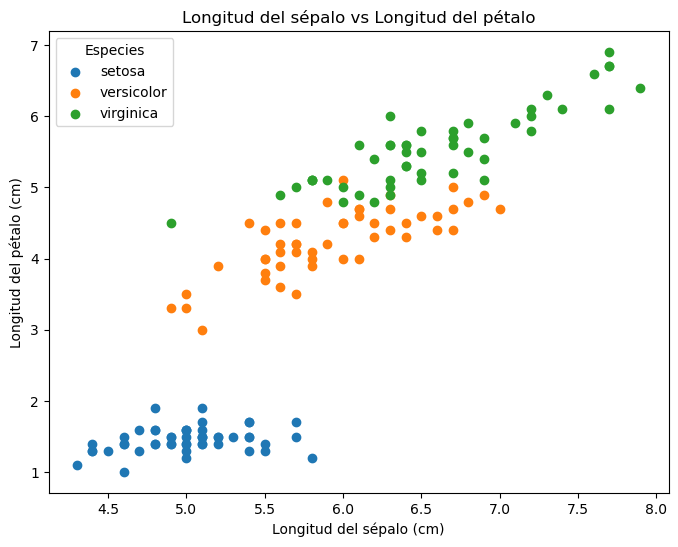

In [104]:
# Gráfico de dispersión para dos características

plt.figure(figsize=(8, 6))
for species in iris_df['species'].unique():
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['largo_sepalo (cm)'], subset['petal length (cm)'], label=species)

# Personalización
plt.title("Longitud del sépalo vs Longitud del pétalo")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")
plt.legend(title="Especies")
plt.show()

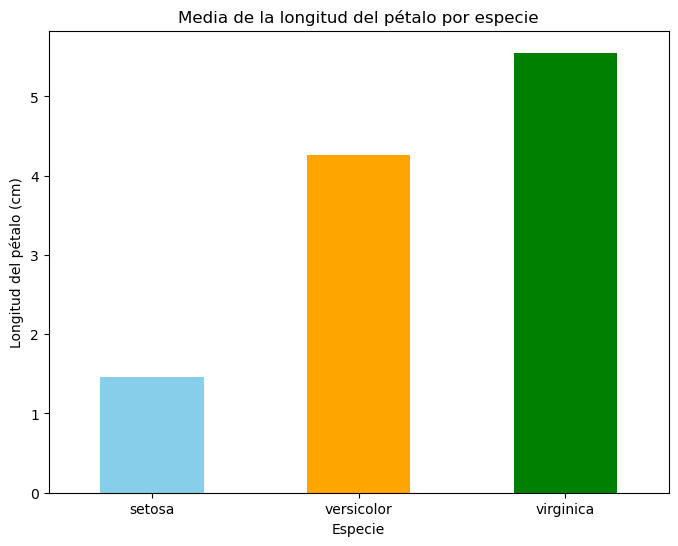

In [105]:
# grafico de barras:

# Calcular la media de la longitud del pétalo por especie
mean_petal_length = iris_df.groupby('species')['petal length (cm)'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
mean_petal_length.plot(kind='bar', color=['skyblue', 'orange', 'green'])

# Personalización
plt.title("Media de la longitud del pétalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del pétalo (cm)")
plt.xticks(rotation=0)
plt.show()


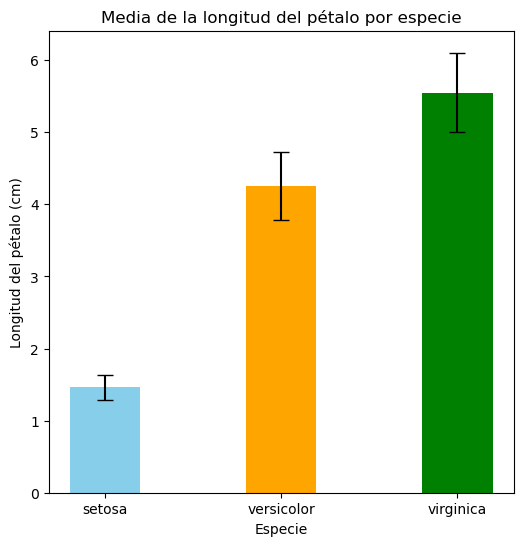

In [114]:
# Supongamos que iris_df es tu DataFrame con los datos de iris
# Calcular la media y la desviación estándar de la longitud del pétalo por especie
mean_petal_length = iris_df.groupby('species')['petal length (cm)'].mean()
std_petal_length = iris_df.groupby('species')['petal length (cm)'].std()

# Crear el gráfico de barras con barras de error
plt.figure(figsize=(6, 6))
plt.bar(mean_petal_length.index, mean_petal_length, yerr=std_petal_length, capsize=6, color=['skyblue', 'orange', 'green'], width=0.4)

# Personalización
plt.title("Media de la longitud del pétalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del pétalo (cm)")
plt.xticks(rotation=0)
plt.show()

/var/folders/hj/k7ttlhvn1zl4xy28kppx2dbh0000gp/T/ipykernel_11656/174993399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal length (cm)', data=iris_df, palette=['skyblue', 'orange', 'green'], width=0.4)


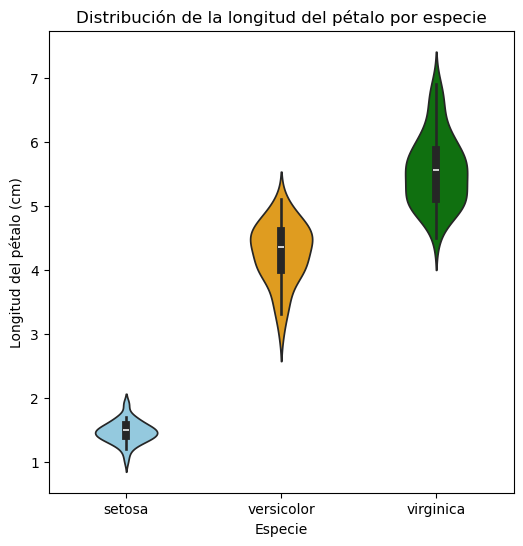

In [117]:
import seaborn as sns

# Supongamos que iris_df es tu DataFrame con los datos de iris

# Crear el gráfico de violín
plt.figure(figsize=(6, 6))
sns.violinplot(x='species', y='petal length (cm)', data=iris_df, palette=['skyblue', 'orange', 'green'], width=0.4)

# Personalización
plt.title("Distribución de la longitud del pétalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del pétalo (cm)")
plt.xticks(rotation=0)
plt.show()

### Colores en Python:

![colores_python](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_00x.png)

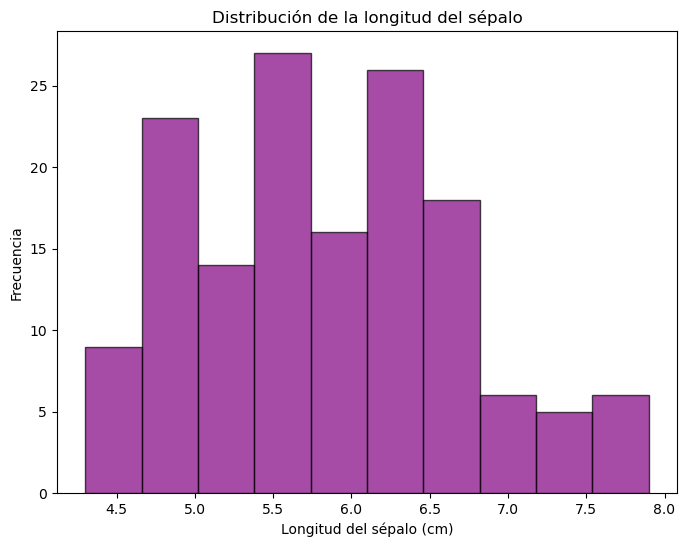

In [108]:
# Histograma de la longitud del sépalo

plt.figure(figsize=(8, 6))
plt.hist(iris_df['largo_sepalo (cm)'], bins=10, color='purple', alpha=0.7, edgecolor='black')

# Personalización
plt.title("Distribución de la longitud del sépalo")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Frecuencia")
plt.show()


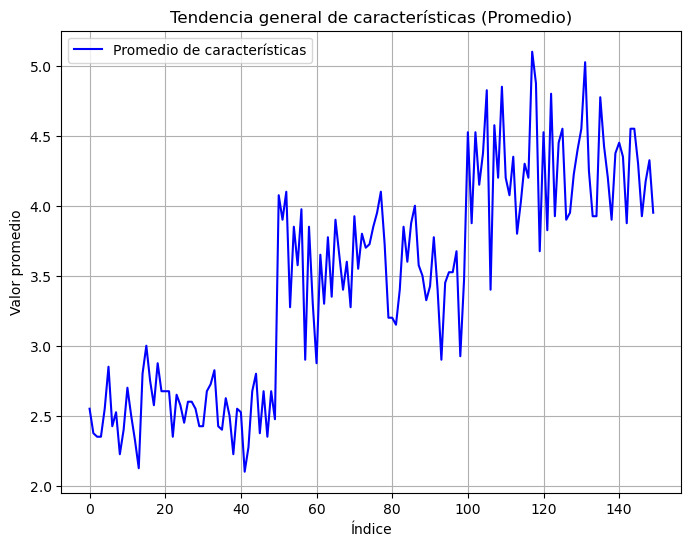

In [132]:
# Promedio de características por índice de fila
iris_avg = iris_df.drop('species', axis=1).mean(axis=1)

# Crear un gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(iris_avg, color='blue', label="Promedio de características")

# Personalización
plt.title("Tendencia general de características (Promedio)")
plt.xlabel("Índice")
plt.ylabel("Valor promedio")
plt.legend()
plt.grid()

plt.show()

In [119]:
iris_df.head()

,largo_sepalo (cm),ancho_sepalo (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 800x600 with 0 Axes>

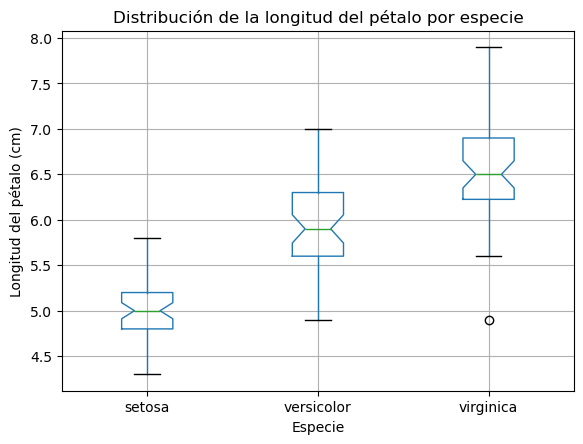

In [ ]:
# Crear un boxplot para la longitud del pétalo por especie
plt.figure(figsize=(8, 6))
iris_df.boxplot(column='largo_sepalo (cm)', by='species', grid=False, notch=True)

# Personalización
plt.title("Distribución de la longitud del pétalo por especie")
plt.suptitle("")  # Eliminar el título automático
plt.xlabel("Especie")
plt.ylabel("Longitud del pétalo (cm)")

plt.grid() # incluye un grid en el gráfico

plt.show()

/var/folders/hj/k7ttlhvn1zl4xy28kppx2dbh0000gp/T/ipykernel_11656/1377105866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='largo_sepalo (cm)', data=iris_df, palette=colors,


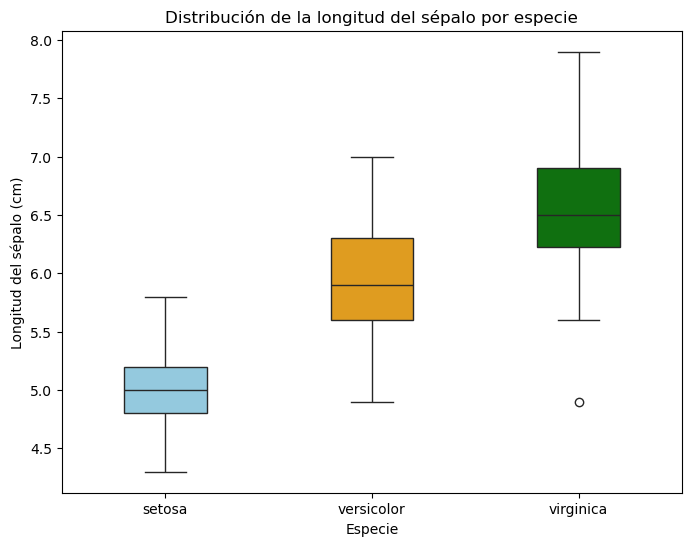

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los colores para cada especie

colors = {'setosa': 'skyblue', 'versicolor': 'orange', 'virginica': 'green'}

# Crear un boxplot para la longitud del pétalo por especie usando Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='largo_sepalo (cm)', data=iris_df, palette=colors, 
            width=0.4, linewidth=1)

# Personalización
plt.title("Distribución de la longitud del sépalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del sépalo (cm)")
plt.show()

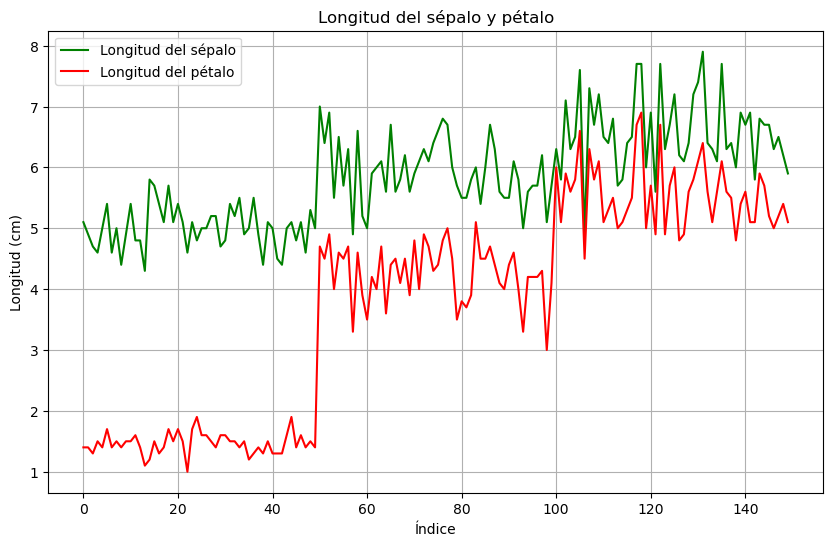

In [135]:
# Gráfico combinado: Longitud del sépalo y pétalo
plt.figure(figsize=(10, 6))
plt.plot(iris_df['largo_sepalo (cm)'], label='Longitud del sépalo', color='green')
plt.plot(iris_df['petal length (cm)'], label='Longitud del pétalo', color='red')

# Personalización
plt.title("Longitud del sépalo y pétalo")
plt.xlabel("Índice")
plt.ylabel("Longitud (cm)")
plt.legend()
plt.grid()
plt.show()


/var/folders/hj/k7ttlhvn1zl4xy28kppx2dbh0000gp/T/ipykernel_11656/1302463977.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='largo_sepalo (cm)', data=iris_df, palette=colors,


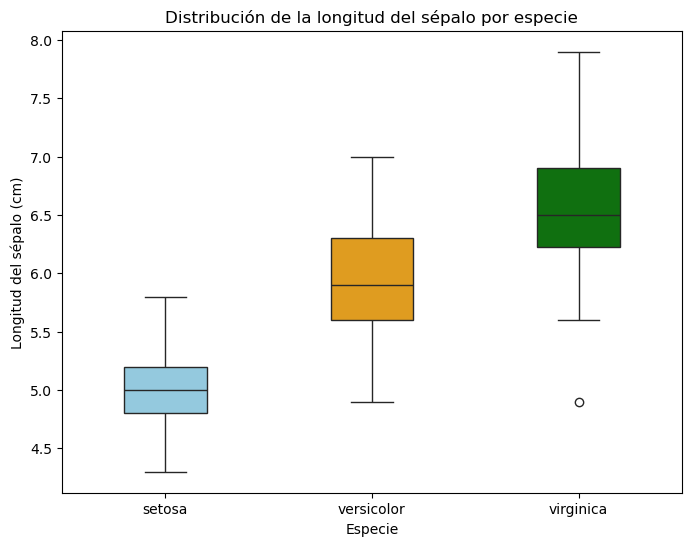

In [136]:
# exportar una figura a un archivo .png

import seaborn as sns
import matplotlib.pyplot as plt

# Definir los colores para cada especie

colors = {'setosa': 'skyblue', 'versicolor': 'orange', 'virginica': 'green'}

# Crear un boxplot para la longitud del pétalo por especie usando Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='largo_sepalo (cm)', data=iris_df, palette=colors, 
            width=0.4, linewidth=1)

# Personalización
plt.title("Distribución de la longitud del sépalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del sépalo (cm)")


# Guardar la figura como PNG (alta resolución) y SVG
plt.savefig("grafico_ejemplo.png", format="png", dpi=300)  # Exportar como PNG
plt.savefig("grafico_ejemplo.svg", format="svg")           # Exportar como SVG

plt.show()

## Algunos analisis estadisticos

### Tarea:

Elaboren un codigo para hacer algunos analisis estadisticos con los datos de Iris, por ejemplo ANOVA, t-test, wilcoxon, PCA, etc. 